In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

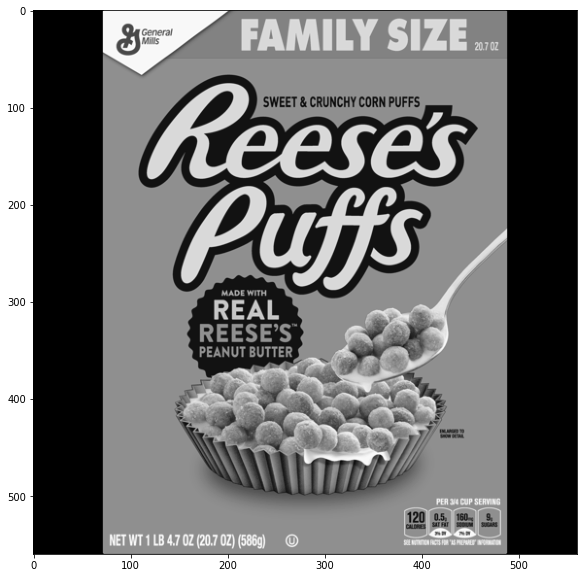

In [4]:
reese = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\reeses_puffs.png',0)
display_img(reese)

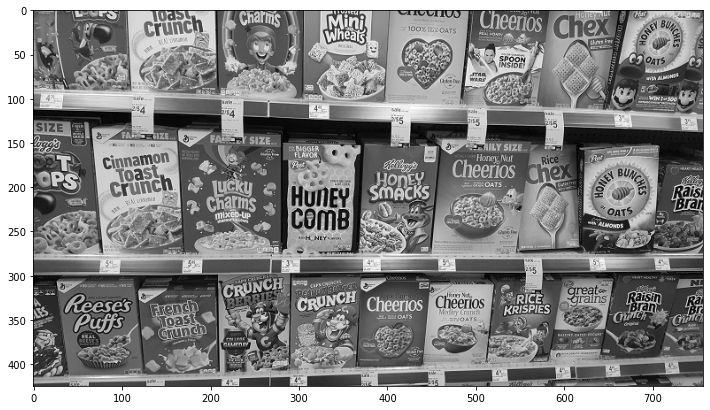

In [7]:
cereal = cv2.imread('D:\ANSON\OpenCV\Computer-Vision-with-Python\DATA\\many_cereals.jpg', 0)
display_img(cereal)

## ORB

In [8]:
orb = cv2.ORB_create()

In [9]:
kp1, des1 = orb.detectAndCompute(reese, None)
kp2, des2 = orb.detectAndCompute(cereal, None)

## Bruce Force

In [11]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [13]:
match = bf.match(des1, des2)

In [15]:
match = sorted(match, key=lambda x: x.distance)

In [16]:
reese_match = cv2.drawMatches(reese, kp1, cereal, kp2, match[:25], None, flags=2)

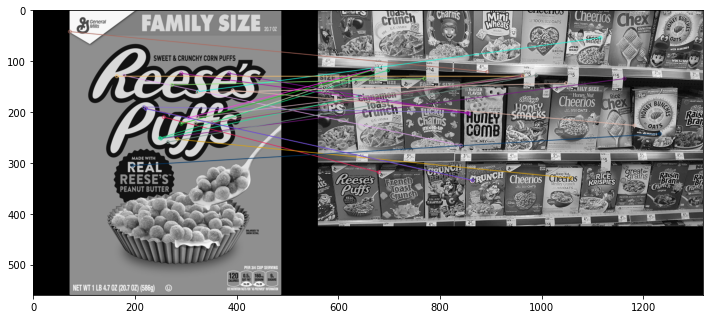

In [17]:
display_img(reese_match)

## SIFT

In [19]:
sift = cv2.SIFT_create()

In [20]:
kp1, des1 = sift.detectAndCompute(reese, None)
kp2, des2 = sift.detectAndCompute(cereal, None)

In [21]:
bf = cv2.BFMatcher()

In [22]:
matches = bf.knnMatch(des1, des2, k=2)

In [23]:
matches

[[<DMatch 103DE350>, <DMatch 11B6AD40>],
 [<DMatch 11DA48D8>, <DMatch 11DA4BA8>],
 [<DMatch 11B4EDB8>, <DMatch 11B4E5C0>],
 [<DMatch 11B4E5A8>, <DMatch 11B4EA40>],
 [<DMatch 11DB75F0>, <DMatch 11DB7878>],
 [<DMatch 11DB7860>, <DMatch 11DB78C0>],
 [<DMatch 11DB7650>, <DMatch 11DB7890>],
 [<DMatch 11DB7830>, <DMatch 11DB7818>],
 [<DMatch 11DB7578>, <DMatch 11DB78D8>],
 [<DMatch 11DB78F0>, <DMatch 11DB7AB8>],
 [<DMatch 11DB77D0>, <DMatch 11DB75A8>],
 [<DMatch 11DB73B0>, <DMatch 11DBD590>],
 [<DMatch 11DBD5A8>, <DMatch 11DBD5C0>],
 [<DMatch 11DBD530>, <DMatch 11DBD4E8>],
 [<DMatch 11DBDF20>, <DMatch 11DBDFB0>],
 [<DMatch 11DBDED8>, <DMatch 11DBDEC0>],
 [<DMatch 11DBDE48>, <DMatch 11DBDFC8>],
 [<DMatch 11DBDEF0>, <DMatch 11DBDDD0>],
 [<DMatch 11DBDE60>, <DMatch 11DBDF08>],
 [<DMatch 11DBDFE0>, <DMatch 11B60080>],
 [<DMatch 11B60488>, <DMatch 10801FE0>],
 [<DMatch 10801770>, <DMatch 108011D0>],
 [<DMatch 10801200>, <DMatch 10801818>],
 [<DMatch 10801830>, <DMatch 13B51548>],
 [<DMatch 13B515

In [24]:
len(matches)

1500

In [28]:
good = []

for mat1, mat2 in matches:
    if mat1.distance < 0.75*mat2.distance:
        good.append([mat1])

In [29]:
len(good)

78

In [30]:
sift_matches = cv2.drawMatchesKnn(reese, kp1, cereal, kp2, good, None, flags=2)

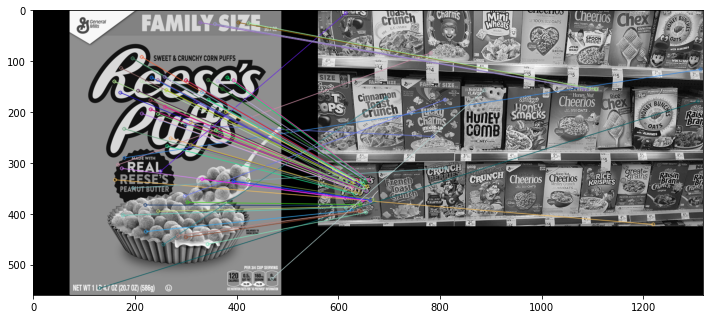

In [31]:
display_img(sift_matches)

In [32]:
sift = cv2.SIFT_create()

In [33]:
kp1, des1 = sift.detectAndCompute(reese, None)
kp2, des2 = sift.detectAndCompute(cereal, None)

## FLANN

In [34]:
FLAN_IDEX_KTREE = 0
index_params = dict(algorithm = FLAN_IDEX_KTREE, trees = 5)
search_params = dict(checks=50)

In [35]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [36]:
matches = flann.knnMatch(des1, des2, k=2)

In [37]:
good = []

for mat1, mat2 in matches:
    if mat1.distance < 0.75*mat2.distance:
        good.append([mat1])

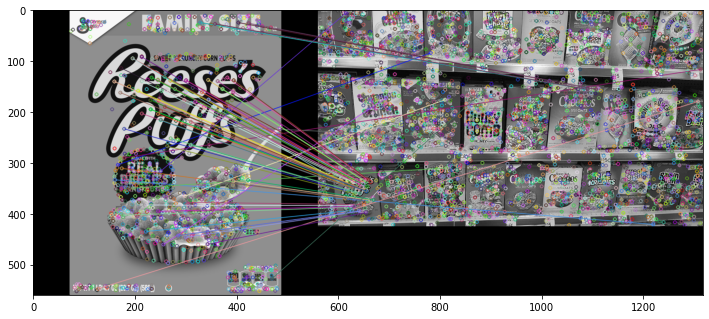

In [38]:
flann_matches = cv2.drawMatchesKnn(reese, kp1, cereal, kp2, good, None, flags=0)
display_img(flann_matches)

## Others

In [39]:
sift = cv2.SIFT_create()

In [40]:
kp1, des1 = sift.detectAndCompute(reese, None)
kp2, des2 = sift.detectAndCompute(cereal, None)

In [41]:
FLAN_IDEX_KTREE = 0
index_params = dict(algorithm = FLAN_IDEX_KTREE, trees = 5)
search_params = dict(checks=50)

In [42]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [43]:
matches = flann.knnMatch(des1, des2, k=2)

In [60]:
match_mask = [[0,0] for i in range(len(matches))]

In [67]:
for i, (mat1, mat2) in enumerate(matches):
    if mat1.distance < 0.75*mat2.distance:
        match_mask[i] = [1,0]

In [68]:
draw_math = dict(matchColor = (0,255,0), 
                singlePointColor = (255,0,0),
                matchesMask = match_mask,
                flags=2)

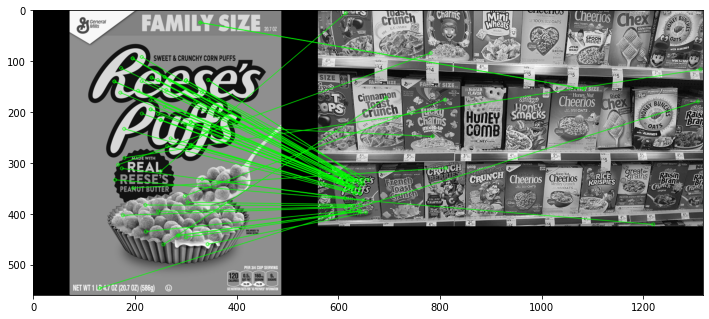

In [69]:
flann_matches = cv2.drawMatchesKnn(reese, kp1, cereal, kp2, matches, None, **draw_math)
display_img(flann_matches)